# First let's import, then look for the assignment below

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_cl

# Assignment-2 Problem-2,3,4: Construct as requested

## 2 graded by SV; 3 by AR; 4 by LT

### BEFORE YOU SUBMIT THIS FILE, PLEASE RENAME THIS FILE BY REPLACING THE 0000000 IN THE FILE NAME WITH YOUR CORRECT UNID. KEEP THE "u" AT THE BEGINNING.

# Problem-2 graded by SV
 
  
1. Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that accepts an even number of *non-overlapping occurrences* of  $010$s. Thoroughly document your construction!
    
HERE ARE EXAMPLES :

* 01010 - does NOT have an even number of 0's because we wanted NON-OVERLAPPING

* 0101010 - has two NON-OVERLAPPING occurrences of 010 -- that is what we want!

* 0101111010 - has two NON-OVERLAPPING occurrences of 010

* 111111 - has ZERO occurrences of 010
    

### Approach: We will name states to remember the essence of the history of inputs so far. If you do so, and also keep the sense of where the machine is (in an I state, an IF state or an F state), then you'll have the solution fall out automatically!

Please read the Jove_User_Manual and the advice given there regarding how to write your automaton markdowns, how to place comments, how to group the lines of a DFA per state, and how to order which transition you may first consider.


In [2]:
Even010 = md2mc('''
DFA 

!! Basic Design:
!!  1. detect 1st occurence pattern of "010".
!!  2. Detect Even occurance count of the pattern.
!!       w/ the ability to finish if string ends with the pattern, or a string of '1's.
!!  3. Detect Odd occurance count of the pattern.
!!       w/ ability to "Finish" if string ends before completing the pattern.
!!
!! Design Notes:
!!  - Nodes that start w/ `I_` are input nodes.
!!  - Nodes that start w/ `S_` are intermediate step nodes.
!!  - Nodes that start w/ `F_` are "Finish" nodes, 
!!       where if there are no more symbols in the strign when it reaches the node, 
!!       the strign is accepted as part of the Language.


!! Detect Possible 1st occurance of the pattern --------------------------------------------
I_0     : 1 -> I_0      !! Ignore non pattern characters
I_0     : 0 -> S_1      !! Could be the start of the pattern
S_1     : 0 -> S_1      !! Ignore reoccuring '0's
S_1     : 1 -> S_2      !! Could still be the pattern
S_2     : 1 -> I_0      !! This is not the pattern !restart search!
S_2     : 0 -> S_3      !! This was the pattern! (odd occurance of the pattern though)

!! Detect Possible Even Occurances of the Pattern ------------------------------------------
S_3     : 1 -> S_3      !! Ignore non pattern Chars
S_3     : 0 -> S_4      !! Could be the star tof the pattern
S_4     : 0 -> S_4      !! Ignore reoccuring '0's
S_4     : 1 -> S_5      !! Could still be the pattern
S_5     : 1 -> S_3      !! This is not the pattern !restart search!
S_5     : 0 -> F_6      !! This was the Pattern! (Even occurence, accept if end of string)

!! Detect Possible Odd Occurences of the Pattern -------------------------------------------
F_6     : 1 -> F_6      !! Ignore non pattern Characters (Even occurence, accept if end of string)
F_6     : 0 -> F_7      !! Could be the start of the pattern (Even occurence, accept if end of string)
F_7     : 0 -> F_7      !! Ignore reoccuring '0's (Even occurence, accept if end of string)
F_7     : 1 -> F_8      !! Could still be the pattern (Even occurence, accept if end of string)
F_8     : 1 -> F_6      !! This is not the pattern !restart search! (Even occurence, accept if end of string)
F_8     : 0 -> S_4      !! This was the pattern! (odd occurance, do NOT accept if end of string)
 
''')

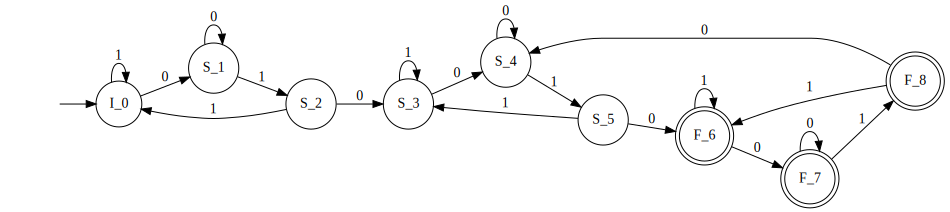

In [3]:
dotObj_dfa(Even010)

# Problem-3 graded by AR

    
3. Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that ends in a $010$, calling it Ends010. Then obtain the intersection with the Even010 machine using intersect_dfa. 
    
    Call the intersection Even010_Ends010.
    
    Next, minimize Even010_Ends010, storing it in min_Even010_Ends010 .
    
    Again, document the construction thoroughly.
    


### Approach: We will define a machine for "ends $010$" as illustrated in SV's part, and negate.

In [6]:
Ends010 =  md2mc('''
DFA

!! Basic Design:
!!  1. detect 1st occurence pattern of "010".
!!       w/ the ability to finish if string ends with the pattern, or a string of '1's.
!!  2. Detect Even occurance count of the pattern.
!!       w/ ability to "Finish" if string ends before completing the pattern.
!!  3. Detect Odd occurance count of the pattern.
!!      w/ the ability to finish if string ends with the pattern, or a string of '1's.
!!
!! Design Notes:
!!  - Nodes that start w/ `I_` are input nodes.
!!  - Nodes that start w/ `S_` are intermediate step nodes.
!!  - Nodes that start w/ `F_` are "Finish" nodes, 
!!       where if there are no more symbols in the strign when it reaches the node, 
!!       the strign is accepted as part of the Language.


!! Detect  pattern ------------------------------------------------------------------------
I_0     : 1 -> I_0      !! Ignore non pattern characters
I_0     : 0 -> S_1      !! Could be the start of the pattern
S_1     : 0 -> S_1      !! Ignore reoccuring '0's
S_1     : 1 -> S_2      !! Could still be the pattern
S_2     : 1 -> I_0      !! This is not the pattern !restart search!
S_2     : 0 -> F_3      !! This was the pattern! (Accept if End of String)

!! Restart if not pattern -----------------------------------------------------------------
F_3     : 1 -> I_0      !! Ignore non pattern Chars
F_3     : 0 -> S_1      !! Could be the start of the pattern
''')

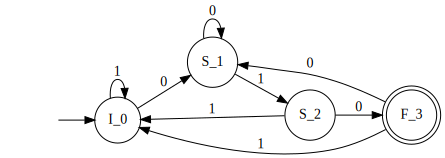

In [7]:
# Let's see the "Ends010" machine
dotObj_dfa(Ends010, FuseEdges=True)

## Obtain the intersection of Even010 and Ends010

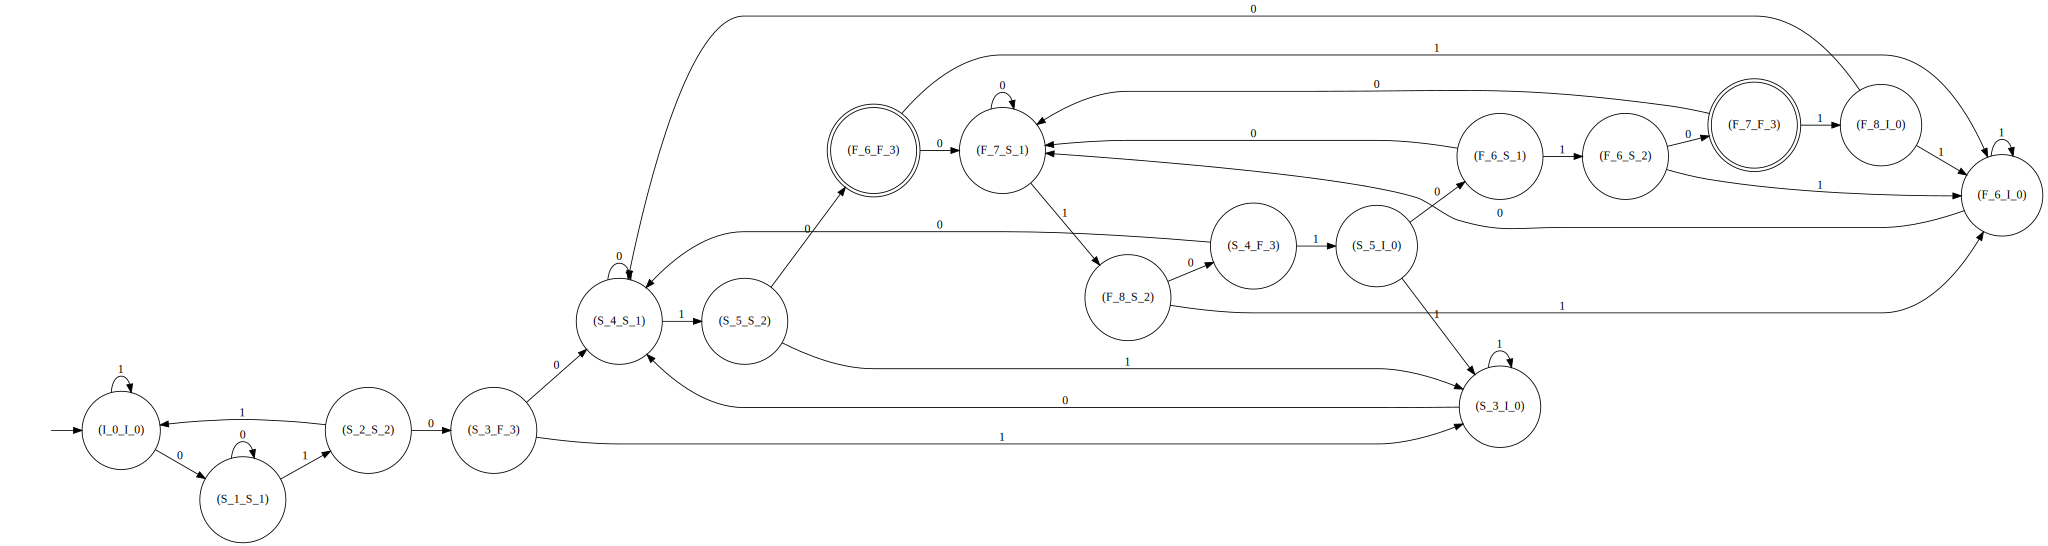

In [8]:
Even010_Ends010 = intersect_dfa(Even010, Ends010)
dotObj_dfa(Even010_Ends010)

## Minimize the intersection of Even010 and Ends010

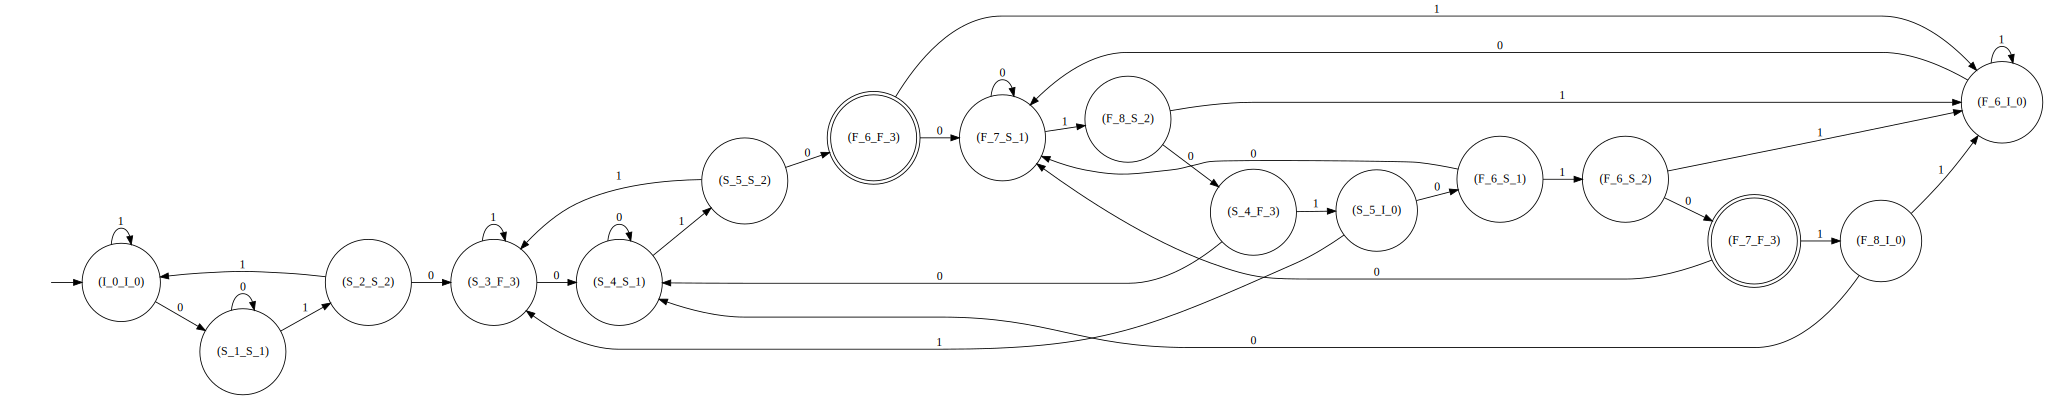

In [9]:
min_Even010_Ends010 = min_dfa(Even010_Ends010)
dotObj_dfa(min_Even010_Ends010)

# Problem-4 graded by LT

<font size="4">    
    
4.  Find out which states were eliminated in the Minimization Process. Explain why it was OK to leave these states out. Test the constructed machine using the template given to you. Finally use the Python "filter" function that filters out the accepted strings.
    
</font>

## Find out which states were eliminated

In [11]:
# Hint: You can obtain the components of a DFA D by using the notation D["Q"] where
# D is a DFA created using the md2mc command. Basically, "D" is a dictionary and 
# D["Q"] obtains the value of the key at "Q". See the lecture slides for Lec-3.

for state in Even010_Ends010["Q"]:
    if state not in min_Even010_Ends010["Q"]:
        print(state)

('S_3', 'I_0')


## Explain why it is OK to leave these states out

A template to guide your answer is below.


**State `S_3_I_0` can be excluded because it is a redundent check for a string of '1's before the start of a pattern, that could be removed and any paths that would have gone to it redirect back to their paths sourse.**

<!-- 
... Your explanations here - a template of your answer is as follows ...
    
**This template tries to limit the number of cases you have to list**
 
 
 * I find that state SOMESTATE1 is present in DFA1 but SOMESTATE1 is absent in DFA2 
 
 
   - I can obtain this info by doing DFA1["Q"] - DFA2["Q"]
   - I can also eye-ball the diagrams and spot the missing state
   - But I recall that in the diagram, a state may show up P_Q while in the DFA1["Q"] - DFA2["Q"] printout, it may show up as ('P','Q')
 
 
 
 * If there are multiple *SOMESTATE1* that are missing in DFA2, please pick the one that involves state letter 'I'  and call that the *SOMESTATE1* for the remaining questions BELOW
 
 
 **IMPORTANT CHANGE:** __Due to some non-reproducibility lurking in Jove, some people may not get a state containing "I". In that case, pick any one state that is missing, and answer the remaining questions.__
 
 * But I find that THIS STRING (pick the shortest string in numeric order) that reached SOMESTATE1 in DFA1 is now reaching state SOMESTATE2 in DFA2
 
 * Thus I conclude that state SOMESTATE1 and SOMESTATE2 are equivalent
 
 * This is further confirmed by the fact that (**here I am limiting your checks to 3 cases**)
   - upon 0, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
   - upon 1, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
   upon 01, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
 
 -->

 


# Testing the machine

In [12]:
help(nthnumeric)

Help on function nthnumeric in module jove.LangDef:

nthnumeric(N, S=['a', 'b'])
    Assume S ('Sigma') is a 2-sized list of chars (default ['a','b']). 
    Produce the Nth string in numeric order, where N >= 0.
    Idea : Given N, get b = floor(log_2(N+1)) - need that 
    many places; what to fill in the places is the binary 
    code for N - (2^b - 1) with 0 as S[0] and 1 as S[1].



## Test the constructed machine the "direct" way

In [13]:
TestList = [ nthnumeric(i, ['0','1']) for i in range(256) ]

In [15]:
help(accepts_dfa)

Help on function accepts_dfa in module jove.Def_DFA:

accepts_dfa(D, s)
    In : D (consistent DFA)
         s (string over D's sigma, including "")
    Out: Boolean (if state after s-run is in D's final).



In [16]:
for test in TestList:
    if accepts_dfa(min_Even010_Ends010, test):
        print(" min_Even010_Ends010 : accepts ", test)
    else:
        print(" min_Even010_Ends010 : does not accept ", test)

min_Even010_Ends010 : does not accept  
 min_Even010_Ends010 : does not accept  0
 min_Even010_Ends010 : does not accept  1
 min_Even010_Ends010 : does not accept  00
 min_Even010_Ends010 : does not accept  01
 min_Even010_Ends010 : does not accept  10
 min_Even010_Ends010 : does not accept  11
 min_Even010_Ends010 : does not accept  000
 min_Even010_Ends010 : does not accept  001
 min_Even010_Ends010 : does not accept  010
 min_Even010_Ends010 : does not accept  011
 min_Even010_Ends010 : does not accept  100
 min_Even010_Ends010 : does not accept  101
 min_Even010_Ends010 : does not accept  110
 min_Even010_Ends010 : does not accept  111
 min_Even010_Ends010 : does not accept  0000
 min_Even010_Ends010 : does not accept  0001
 min_Even010_Ends010 : does not accept  0010
 min_Even010_Ends010 : does not accept  0011
 min_Even010_Ends010 : does not accept  0100
 min_Even010_Ends010 : does not accept  0101
 min_Even010_Ends010 : does not accept  0110
 min_Even010_Ends010 : does not accep

## Use Python's "filter" function to filter out the accepted strings directly

In [17]:
list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), TestList))

['010010', '0010010', '0100010', '0101010', '1010010']

## Doubled the testing range; now finding at least ten strings !!

In [20]:
TestList2 = [ nthnumeric(i, ['0','1']) for i in range(512) ]
accepted = list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), TestList2))
print(f"Accepted Strings:\n  {accepted}\nNumber of Accepted Strings:  {len(accepted)}")

Accepted Strings:
  ['010010', '0010010', '0100010', '0101010', '1010010', '00010010', '00100010', '00101010', '01000010', '01010010', '01011010', '10010010', '10100010', '10101010', '11010010']
Number of Accepted Strings:  15


# END